# Whisper V2 vs Whisper v3 vs Distil Whisper Transcription Times

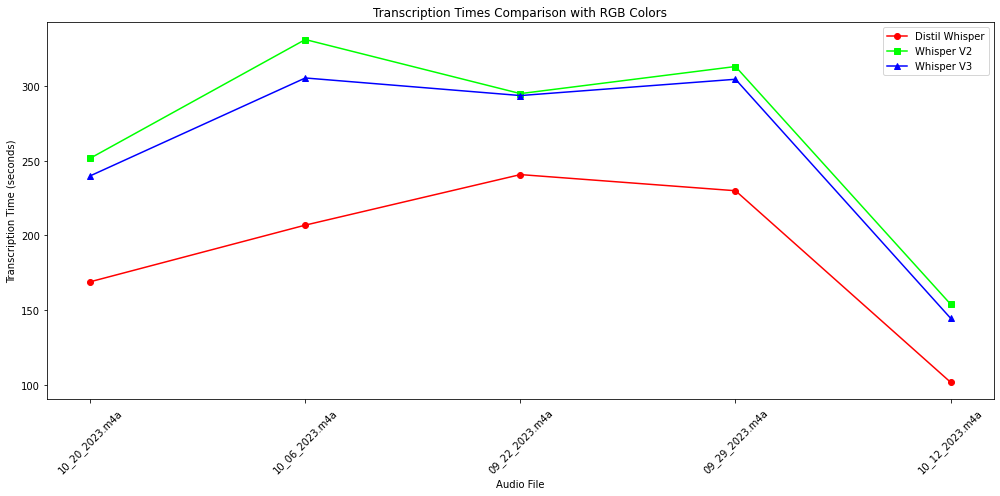

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert audio_length to a comparable numerical value (total seconds)
def convert_to_seconds(time_str):
    # Split the time string into its components
    minutes, seconds = map(int, time_str.strip('m s').split('m '))
    # Convert to total seconds
    return minutes * 60 + seconds

# Load the CSV files into pandas dataframes
df1 = pd.read_csv('distil_whisper_transcription_log.csv')
df2 = pd.read_csv('transcription_log.csv')
df3 = pd.read_csv('whisper_v3_transcription_log.csv')



# Prepare the plot with specified RGB colors
plt.figure(figsize=(14, 7))

# RGB colors for each line
colors = {
    'Distil Whisper': (1, 0, 0),  # Red
    'Whisper V2': (0, 1, 0),      # Green
    'Whisper V3': (0, 0, 1)       # Blue
}

# Plotting the line graph with RGB colors
plt.plot(df1['audio_file'], df1['transcription_time(s)'], label='Distil Whisper', marker='o', color=colors['Distil Whisper'])
plt.plot(df2['audio_file'], df2['transcription_time(s)'], label='Whisper V2', marker='s', color=colors['Whisper V2'])
plt.plot(df3['audio_file'], df3['transcription_time(s)'], label='Whisper V3', marker='^', color=colors['Whisper V3'])

# Add titles and labels
plt.title('Transcription Times Comparison with RGB Colors')
plt.xlabel('Audio File')
plt.ylabel('Transcription Time (seconds)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()

# Show the plot with the RGB colors
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


<Figure size 1008x504 with 0 Axes>

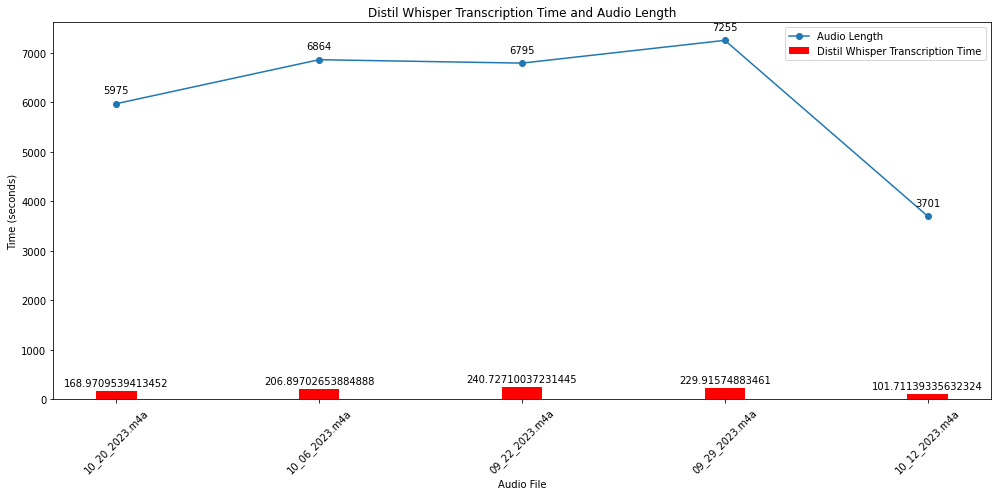

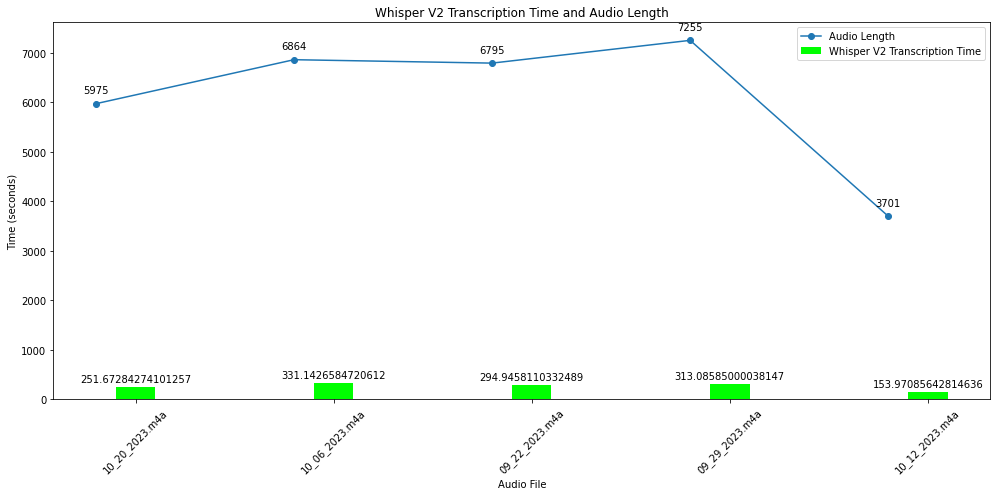

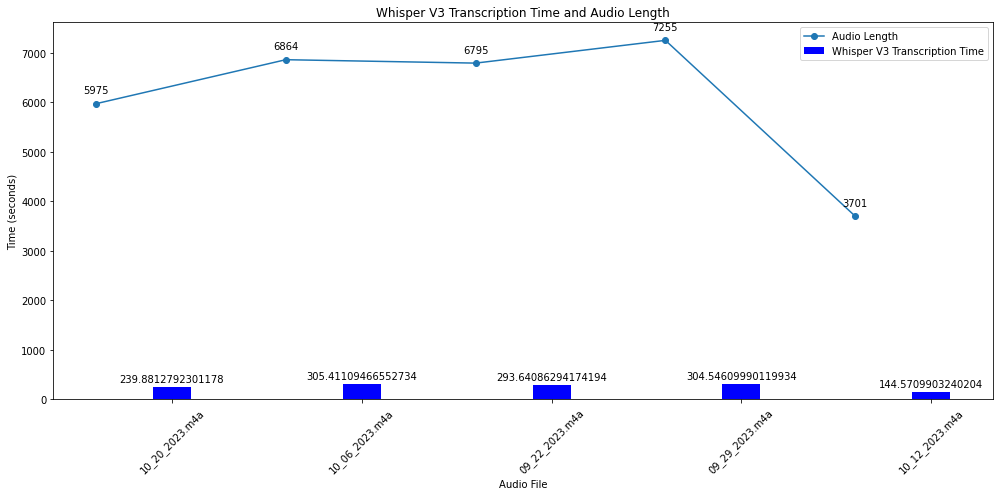

In [2]:
import numpy as np

# Prepare the combined plot with transcription times as bar plots and audio length as a line graph

plt.figure(figsize=(14, 7))

# Setting the width of the bars
bar_width = 0.2

# Calculating the position of the bars
r1 = np.arange(len(df1['audio_file']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Convert audio_length to a comparable numerical value (total seconds)
def convert_to_seconds(time_str):
    # Split the time string into its components
    minutes, seconds = map(int, time_str.strip('m s').split('m '))
    # Convert to total seconds
    return minutes * 60 + seconds

# Apply conversion to the 'audio_length' column for all dataframes
df1['audio_length_sec'] = df1['audio_length'].apply(convert_to_seconds)
df2['audio_length_sec'] = df2['audio_length'].apply(convert_to_seconds)
df3['audio_length_sec'] = df3['audio_length'].apply(convert_to_seconds)

# Function to create an individual plot for each model with bar and line graph
def create_individual_plot(df, model_name, bar_color, bar_positions):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create the bar plot for transcription times
    bars = ax.bar(bar_positions, df['transcription_time(s)'], color=bar_color, width=bar_width, label=model_name + ' Transcription Time')
    
    # Adding the values on the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Plot the line graph for the audio lengths
    line = ax.plot(df['audio_file'], df['audio_length_sec'], label='Audio Length', marker='o', linestyle='-', color='tab:blue')
    
    # Adding the values on the line points
    for i, txt in enumerate(df['audio_length_sec']):
        ax.annotate(txt, (df['audio_file'][i], df['audio_length_sec'][i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Add titles and labels
    ax.set_title(f'{model_name} Transcription Time and Audio Length')
    ax.set_xlabel('Audio File')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df['audio_file'], rotation=45)
    ax.set_ylabel('Time (seconds)')

    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Create the individual plots for each model
create_individual_plot(df1, 'Distil Whisper', colors['Distil Whisper'], r1)
create_individual_plot(df2, 'Whisper V2', colors['Whisper V2'], r2)
create_individual_plot(df3, 'Whisper V3', colors['Whisper V3'], r3)


In [3]:
# Create a new DataFrame to combine the transcription times from all three models
combined_transcription_times_df = pd.DataFrame({
    'Audio File': df1['audio_file'],
    'Distil Whisper Time (s)': df1['transcription_time(s)'],
    'Whisper V2 Time (s)': df2['transcription_time(s)'],
    'Whisper V3 Time (s)': df3['transcription_time(s)']
})



# Adding the original audio length column to the combined DataFrame
combined_transcription_times_df['Audio Length (s)'] = df1['audio_length_sec']


# Convert the time from seconds to minutes in the combined DataFrame
combined_transcription_times_df['Distil Whisper Time (min)'] = combined_transcription_times_df['Distil Whisper Time (s)'] / 60
combined_transcription_times_df['Whisper V2 Time (min)'] = combined_transcription_times_df['Whisper V2 Time (s)'] / 60
combined_transcription_times_df['Whisper V3 Time (min)'] = combined_transcription_times_df['Whisper V3 Time (s)'] / 60
combined_transcription_times_df['Audio Length (min)'] = combined_transcription_times_df['Audio Length (s)'] / 60

# Drop the seconds columns to avoid confusion
combined_transcription_times_df.drop(['Distil Whisper Time (s)', 'Whisper V2 Time (s)', 'Whisper V3 Time (s)', 'Audio Length (s)'], axis=1, inplace=True)

# Display the updated DataFrame with times in minutes
combined_transcription_times_df.head()


,Audio File,Distil Whisper Time (min),Whisper V2 Time (min),Whisper V3 Time (min),Audio Length (min)
0,10_20_2023.m4a,2.816183,4.194547,3.998021,99.583333
1,10_06_2023.m4a,3.448284,5.519044,5.090185,114.400000
2,09_22_2023.m4a,4.012118,4.915764,4.894014,113.250000
3,09_29_2023.m4a,3.831929,5.218098,5.075768,120.916667
4,10_12_2023.m4a,1.695190,2.566181,2.409517,61.683333
